In [5]:
setpath

Setting CVX paths...done.


## Figure 2

Here we will look at teleportation using the one-parameter family of states 

$$ \rho = p\left|\Phi^+\right\rangle \left\langle \Phi^+ \right| + (1-p)\left| 01 \right\rangle \left\langle 01 \right| $$
using a full Bell-State-Measurement (BSM), and with input states $\omega_x$ the 6 eigenstates of the Pauli spin operators $X$, $Y$ and $Z$. 

In [ ]:
d = 2; % local dimension of all systems 
k = 2; % level of Doherty hierarchy to use

% states

rhoME = MaxEntangled(d)*MaxEntangled(d)';
rho01 = [0 1 0 0]'*[0 1 0 0];

% (full) Bell state measurement

Ma = BellStateMeasurement(d);

% (tomographically complete) input states

for x = 1:3
    for a = 0:1
        omegax(:,:,1+a+2*(x-1)) = (eye(2) + (-1)^a*Pauli(x))/2;
    end
end

Produce the data for the graph:

In [7]:
npoints = 101; % number of points to plot
pv = linspace(0,1,npoints); 

TRGv = zeros(1,npoints);
TRCv = zeros(1,npoints);
TRRv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TRGv(i) = teleportationRobustness(sigax,omegax,k);
    TRCv(i) = teleportationClassicalRobustness(sigax,omegax,k);
    TRRv(i) = teleportationRandomRobustness(sigax,omegax,k);
    
end

We also want to compare to the average fidelity of teleportation that can be acheived with this family of states. 

In [27]:
Ftelv = zeros(1,npoints);

for i = 1:npoints
    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    for a = 1:4
        Ftelv(i) = max(Ftelv(i),trace(rho*Ma(:,:,a))); 
        % We check the fidelity with the 4 outcomes of the BSM, since this is sufficient in this case to
        % find the average fidelity of teleportation
    end
end

Plot the graph:

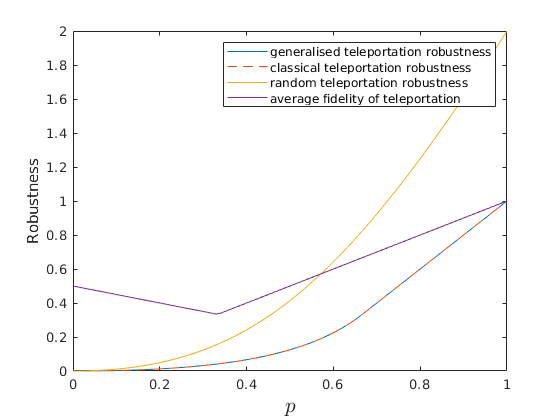

In [28]:
plot(pv,TRGv,pv,TRCv,'--',pv,TRRv,pv,Ftelv)
ax = gca;
legend({'generalised teleportation robustness','classical teleportation robustness',...
'random teleportation robustness','average fidelity of teleportation'})
xlabel('$p$','Interpreter','latex','FontSize',16)
ylabel('Robustness')

## Figure 3

In this figure we will look at the same state from above, but now we will look at the Teleportation Weight (TW) instead. We will consider a partial BSM as well as the full BSM, and consider non-tomographically complete sets of states -- eigenstates of $X$ and $Y$ only.

In [32]:
% (partial) Bell state measurement

Na = zeros(d^2,d^2,2);
Na(:,:,1) = Ma(:,:,1);
Na(:,:,2) = eye(d^2) - Na(:,:,1);

% (non tomographically complete) input states

chix = omegax(:,:,1:4);

Produce the data for the graph:

In [35]:
npoints = 101; 
pv = linspace(0,1,npoints);

TWftv = zeros(1,npoints);
TWptv = zeros(1,npoints);
TWfiv = zeros(1,npoints);
TWpiv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    
    sigax = genTeleportationData(rho,Ma,omegax);
    TWftv(i) = teleportationWeight(sigax,omegax,k);
    
    sigax = genTeleportationData(rho,Na,omegax);
    TWptv(i) = teleportationWeight(sigax,omegax,k);
    
    sigax = genTeleportationData(rho,Ma,chix);
    TWfiv(i) = teleportationWeight(sigax,chix,k);
    
    sigax = genTeleportationData(rho,Na,chix);
    TWpiv(i) = teleportationWeight(sigax,chix,k);
    
end

Plot the graph:

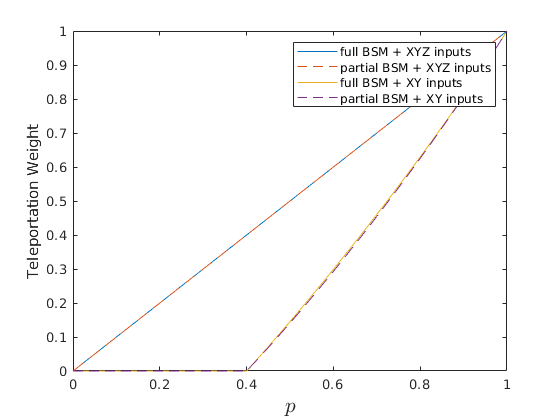

In [37]:
plot(pv,TWftv,pv,TWptv,'--',pv,TWfiv,pv,TWpiv,'--')
ax = gca;
legend({'full BSM + XYZ inputs','partial BSM + XYZ inputs',...
'full BSM + XY inputs','partial BSM + XY inputs'})
xlabel('$p$','Interpreter','latex','FontSize',16)
ylabel('Teleportation Weight')

## Figure 4

In [38]:
d = 3;
k = 2;

% (full) Bell state measurement

Ma = BellStateMeasurement(d);

% input states (randomly choisen)

omegax = zeros(d,d,d^2);
for i = 1:d^2
    psi = RandomStateVector(d);
    omegax(:,:,i) = psi*psi';
end

In [ ]:
npoints = 101; 
av = linspace(0,1,npoints);

TRGv = zeros(1,npoints);
TRCv = zeros(1,npoints);
TRRv = zeros(1,npoints);
TWv = zeros(1,npoints);

for i = 1:npoints

    rho = HorodeckiState(av(i));
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TRGv(i) = teleportationRobustness(sigax,omegax,k);
    TRCv(i) = teleportationClassicalRobustness(sigax,omegax,k);
    TRRv(i) = teleportationRandomRobustness(sigax,omegax,k);
    TWv(i) = teleportationWeight(sigax,omegax,k);
    
end

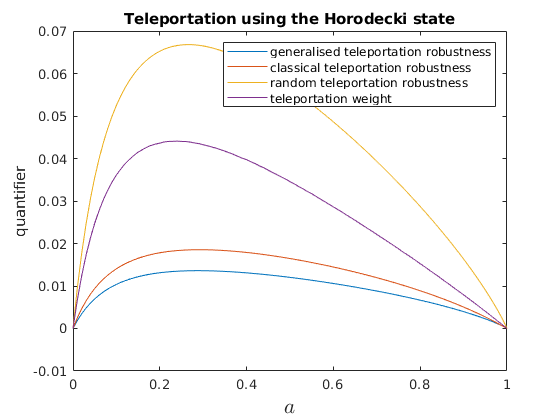

In [44]:
plot(av,TRGv,av,TRCv,av,TRRv,av,TWv)
ax = gca;
legend({'generalised teleportation robustness','classical teleportation robustness',...
'random teleportation robustness','teleportation weight'})
xlabel('$a$','Interpreter','latex','FontSize',16)
ylabel('quantifier')
title('Teleportation using the Horodecki state')